Methods to apply Regression on Real numbered parameters, using complex coefficients.


To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane


Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [1]:
from linear_regression import \
    ComplexLinearRegression, LinearRegression
import math
import numpy as np
import random
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [2]:
X, y = make_regression(
    n_samples = 1000,
    n_features = 2,
    n_informative = 2,
    n_targets = 1,#
    #bias = 0.1,
    noise=10,
    random_state=4
)

# Make none-linear
y = np.abs(y)

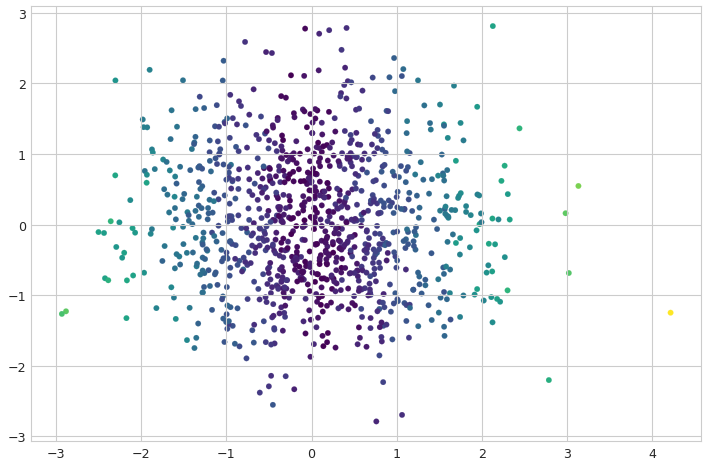

In [3]:
plt.scatter(x = X[:,0], y = X[:,1], c = y)

# Complex Valued Linear Regression

In [4]:
clr = ComplexLinearRegression(alpha = 0.005, n_iter=10000)

clr.fit(X, y)

100%|██████████| 10000/10000 [34:17<00:00,  4.86it/s]


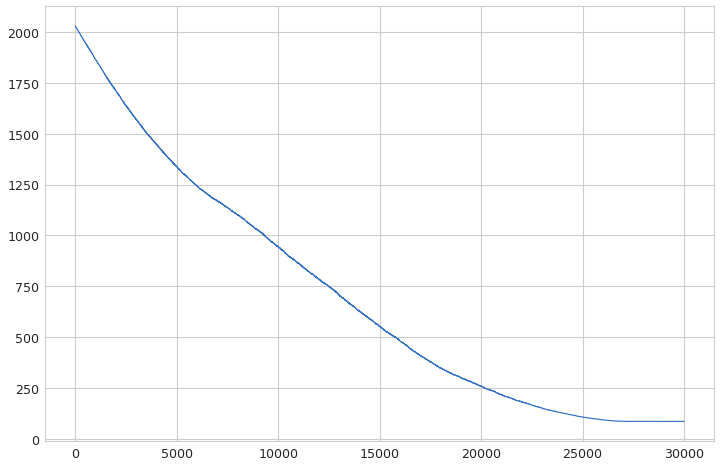

In [5]:
# Plotting loss
plt.plot(clr.loss)

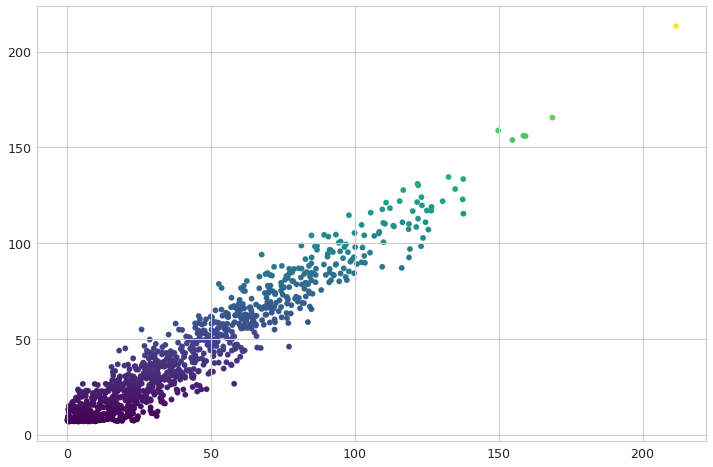

In [6]:
# Comparing predicted and expected results
plt.scatter(x = y, y = clr.predict(X), c = clr.predict(X))

0 dimension path, with step count.


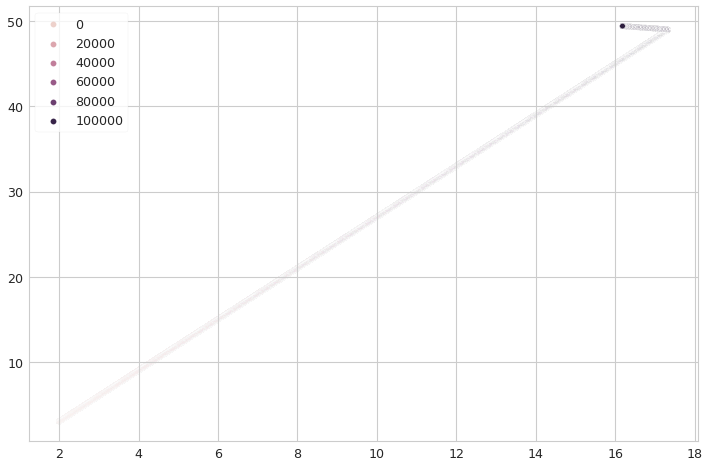


1 dimension path, with step count.


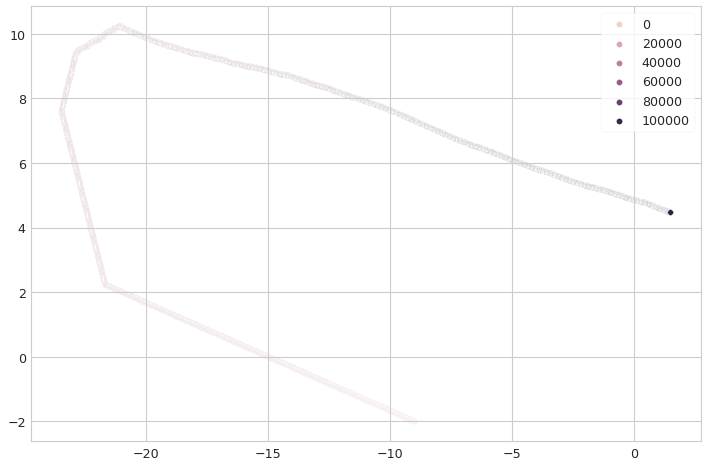


2 dimension path, with step count.


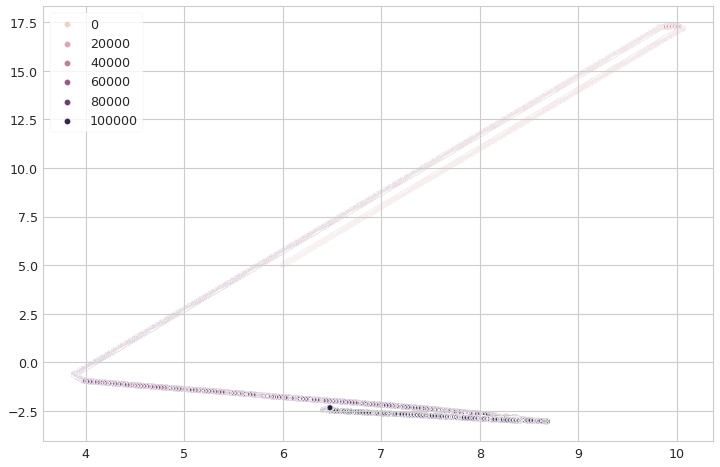

In [7]:
# Plot gradient path of variables
history = clr.weights_history
for j in range(history[0].shape[0]):
    print(f"{j} dimension path, with step count.")
    sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
    plt.show()
    print("")

In [8]:
print(f"MSE: {sum((y - clr.predict(X))**2)/len(y)}")

MSE: 84.617914300902


# Compare to Real valued Linear Regression

In [9]:
lr = LinearRegression(alpha = 0.005, n_iter=10000)

lr.fit(X, y)

100%|██████████| 10000/10000 [09:07<00:00, 18.25it/s]


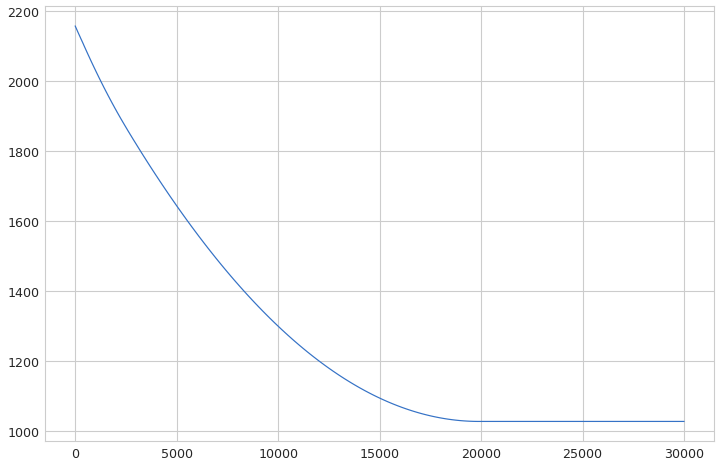

In [10]:
# Plotting loss
plt.plot(lr.loss)

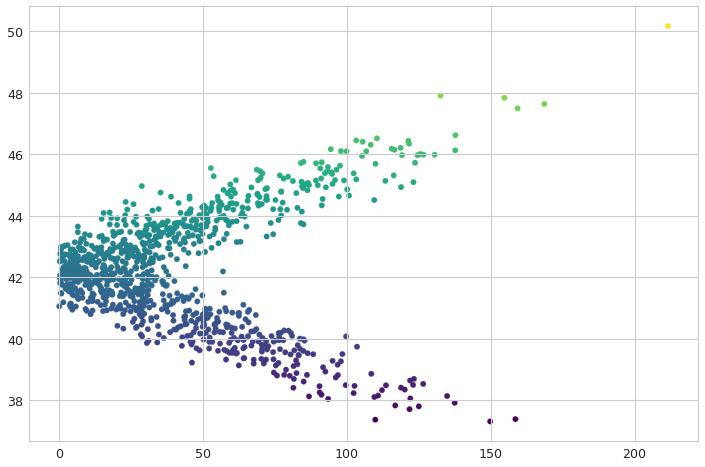

In [11]:
# Comparing predicted and expected results
plt.scatter(x = y, y = lr.predict(X), c = lr.predict(X))

0 dimension path, with step count.


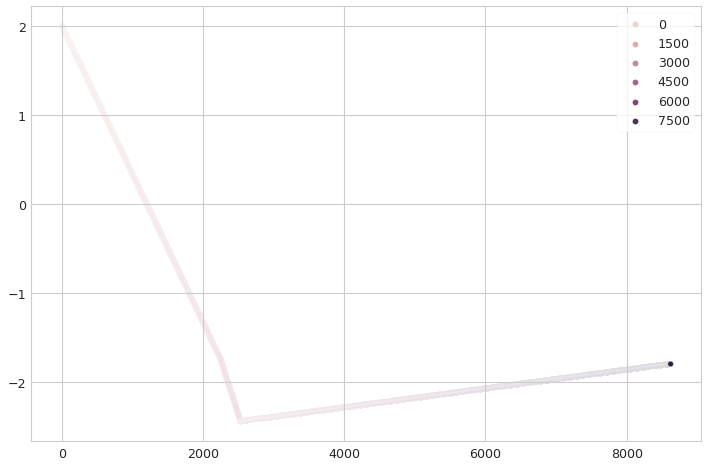


1 dimension path, with step count.


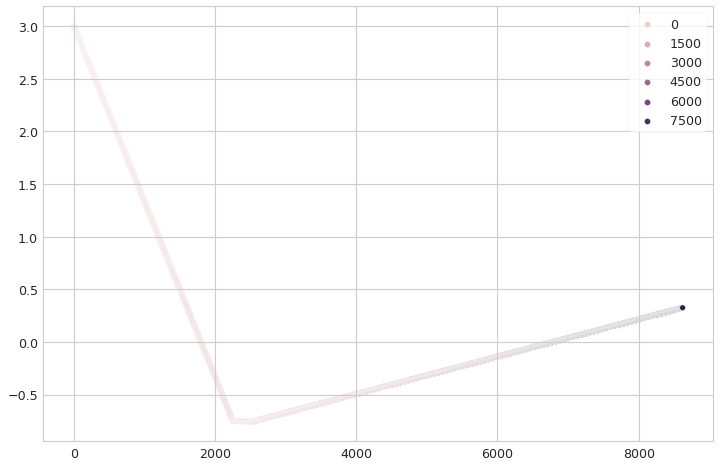


2 dimension path, with step count.


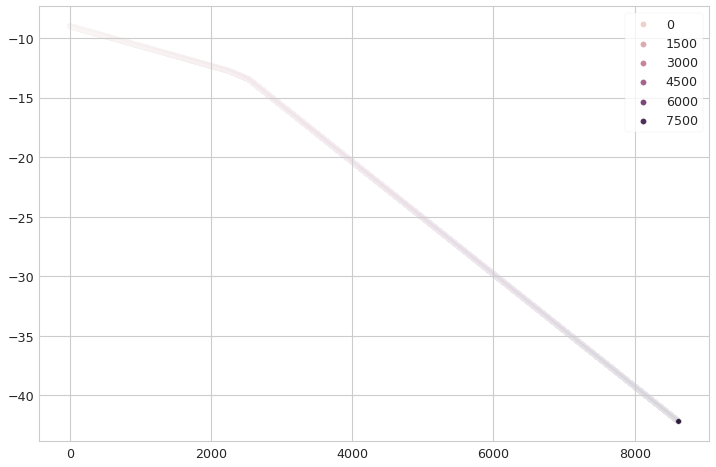

In [12]:
# Plot gradient path of variables
history = lr.weights_history
for j in range(history[0].shape[0]):
    print(f"{j} dimension path, with step count.")
    sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
    plt.show()
    print("")

In [13]:
print(f"MSE: {sum((y - lr.predict(X))**2)/len(y)}")

MSE: 1027.8370251913814


# Compare to Real valued Sklearn Linear Regression

MSE: 1027.837018871435


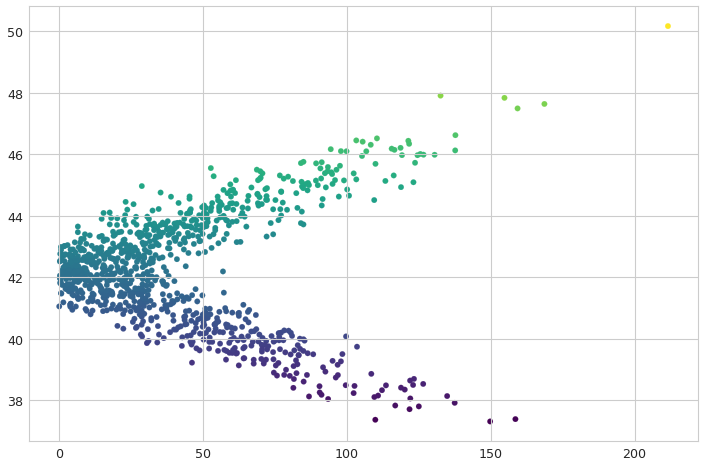

In [26]:
from sklearn.linear_model import LinearRegression
lin_r = LinearRegression()

lin_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = lin_r.predict(X), c = lin_r.predict(X))

print(f"MSE: {sum((y - lin_r.predict(X))**2)/len(y)}")

# Compare to non-linear Regression

### SGDRegressor

MSE: 1028.0433043439461


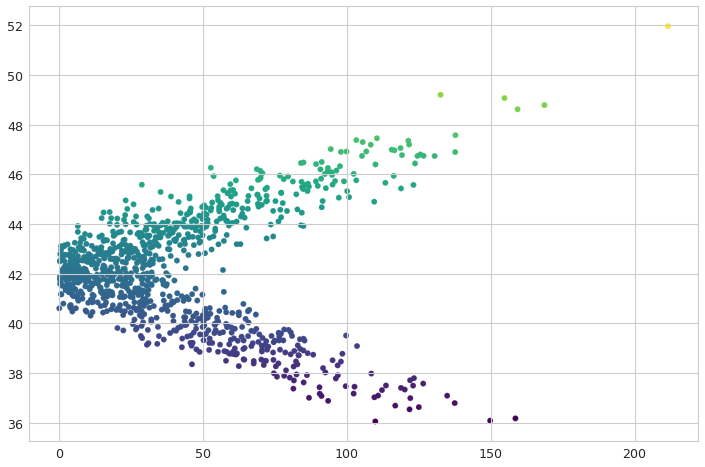

In [27]:
from sklearn.linear_model import SGDRegressor
sgd_r = SGDRegressor()

sgd_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = sgd_r.predict(X), c = sgd_r.predict(X))

print(f"MSE: {sum((y - sgd_r.predict(X))**2)/len(y)}")

### MLPRegressor

MSE: 217.18879742103863


/home/daire/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


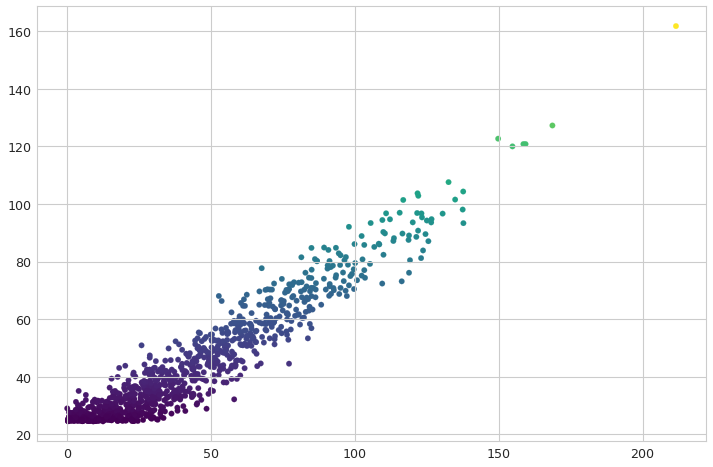

In [28]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor()

mlp_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = mlp_r.predict(X), c = mlp_r.predict(X))

print(f"MSE: {sum((y - mlp_r.predict(X))**2)/len(y)}")

### SVM

MSE: 210.63968184411613


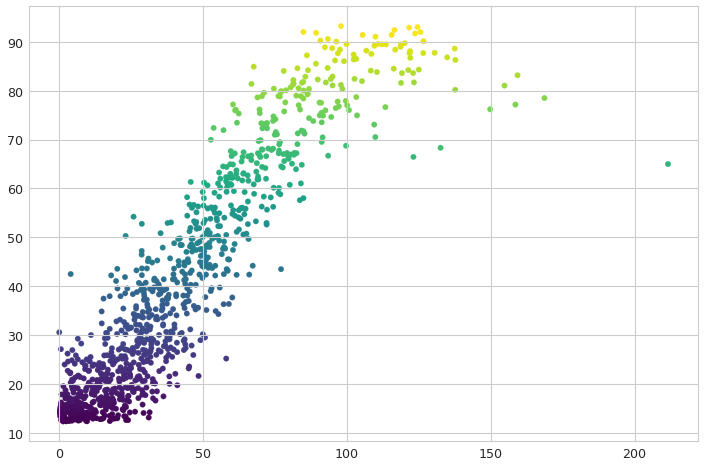

In [30]:
from sklearn.svm import SVR
svm_r = SVR()

svm_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = svm_r.predict(X), c = svm_r.predict(X))

print(f"MSE: {sum((y - svm_r.predict(X))**2)/len(y)}")